In [1]:
import pandas as pd

# Load datasets
diet_df = pd.read_csv('/Users/pavelpavlov/Desktop/gaussian_peppers/food_diets_eda/raw_data/share-healthy-diet-unaffordable/share-healthy-diet-unaffordable.csv')
inflation_df = pd.read_csv('/Users/pavelpavlov/Desktop/gaussian_peppers/food_diets_eda/cleaned_data/inflation_of_consumer_prices_cleaned.csv')


In [2]:
print(inflation_df.columns)


Index(['Entity', 'Code', 'Year', 'Inflation, consumer prices (annual %)'], dtype='object')


In [ ]:
# Merge on Country and Year
merged_df = pd.merge(diet_df, inflation_df, on=['Country', 'Year'])


In [ ]:
# Overall correlation
overall_corr = merged_df[['Share_Diet', 'Inflation']].corr()

# Correlation per country
country_corrs = merged_df.groupby('Country').apply(lambda df: df[['Share_Diet', 'Inflation']].corr().iloc[0,1])


/var/folders/yh/g7vq8gw96lb2ghdgftx2fymh0000gn/T/ipykernel_50503/271258337.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_corrs = merged_df.groupby('Country').apply(lambda df: df[['Share_Diet', 'Inflation']].corr().iloc[0,1])


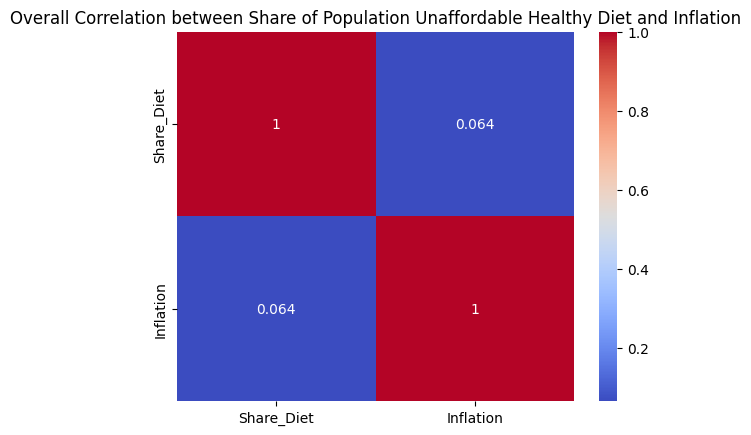

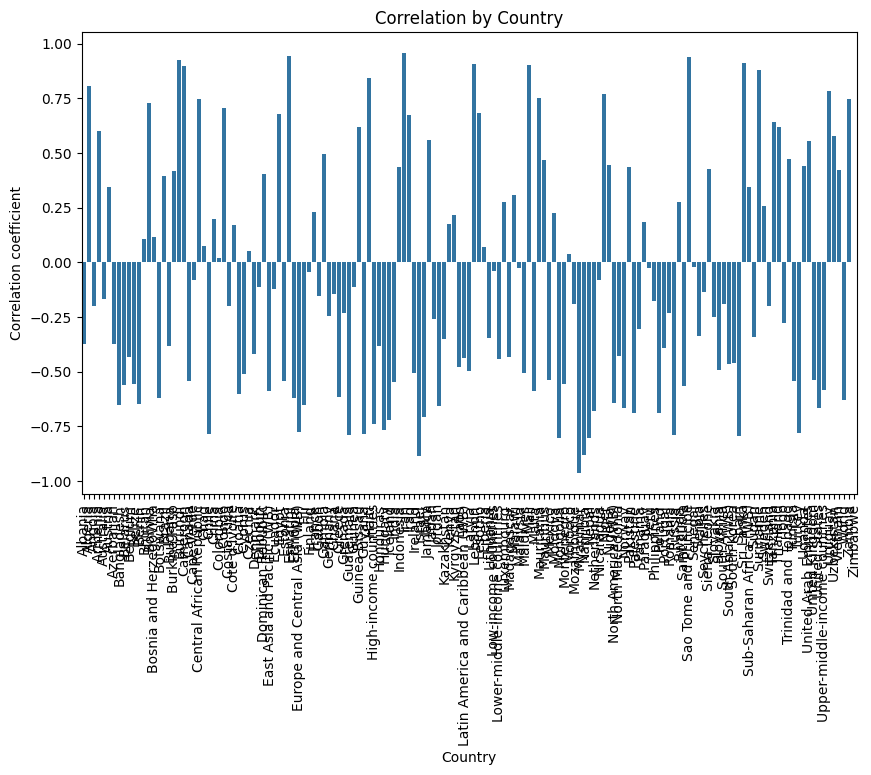

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot overall correlation heatmap
sns.heatmap(overall_corr, annot=True, cmap='coolwarm')
plt.title('Overall Correlation between Share of Population Unaffordable Healthy Diet and Inflation')
plt.show()


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort country correlations by value (descending)
country_corrs_sorted = country_corrs.sort_values(ascending=False)
plt.figure(figsize=(10,12))  # smaller width for readability
sns.barplot(x=country_corrs_sorted.values, y=country_corrs_sorted.index, orient='h')
plt.xlabel('Correlation coefficient')
plt.title('Correlation by Country (sorted)')
plt.tight_layout()
plt.show()


NameError: name 'country_corrs' is not defined